In [1]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

### **creating the functions**
##### ***1. Gaussian Blur (usful in finding the most important features under hard situations like bluring eh el hayfdal zaher ra8m el bluring like (SIFT))***

In [26]:
def gaussian_filter(img):
  Gaussian = cv.GaussianBlur(img, (15, 15), 0)  
  return Gaussian


### ***Converting to gray scale (helps in many things specially in Edge detection)***

In [42]:
def Convert_to_gray(img):
    modified_img = cv.cvtColor(img , cv.COLOR_RGB2GRAY)
    return modified_img

### **usage for the SOBEL filters**
 it is a type of filter that is used for edge detection in images. It is defined by a specific matrix or window size, such as 3x3 or 5x5, and is applied to the image to highlight the edges by calculating the gradient intensity
 ### it is also has a types 
 1.  (x)
[1 0 -1] 
[2 0 -2] 
[1 0 -1]
 2.  (y) 
 [1 2 1] 
 [0 0 0] 
 [-1 -2 -1] 
 3. combined
 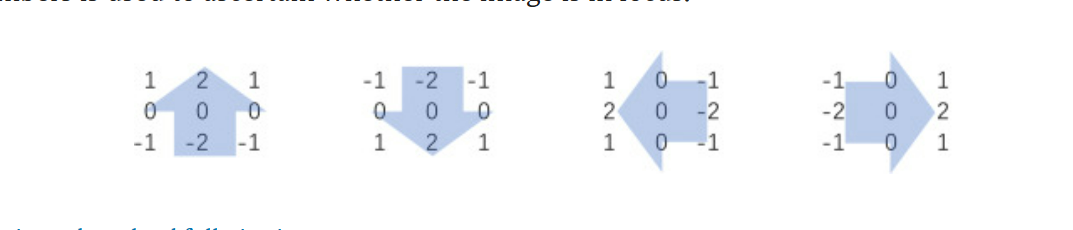

In [ ]:
# def sobel_filter(img):
#     gray = Convert_to_gray(img)
#     image_filterx = cv.Sobel(gray , cv.CV_64F ,1 , 0 ,  ksize=3)
#     image_filtery = cv.Sobel(gray ,  cv.CV_64F ,0 , 1 , ksize=3)
    
#     image_combined = cv.bitwise_or(image_filterx , image_filtery)
#     return image_filterx , image_filtery , image_combined

In [24]:
def sobel_filter(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) if len(img.shape) == 3 else img.copy()
    # Calculating  gradients
    grad_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
    grad_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
    # Take absolute values and convert to 8-bit
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    # Correct way to combine gradients (weighted sum)
    grad_combined = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return abs_grad_x, abs_grad_y, grad_combined

In [11]:
def laplacian_filter (img):
    image = img 
    return cv.Laplacian(image ,ddepth=3 , ksize= 3)
    

In [9]:
def convert_to_RGB(image):
    image_rgb= cv.cvtColor(image , cv.COLOR_BGR2RGB)
    return image_rgb

In [40]:
image = cv.imread('cats.jpg')
image_rgb = convert_to_RGB(image)
gray = Convert_to_gray(image)
lap_image = laplacian_filter(image)
sobelx , sobely  , img_combined = sobel_filter(image)
img_Gaussian = gaussian_filter(image_rgb)


### ***Visualization***

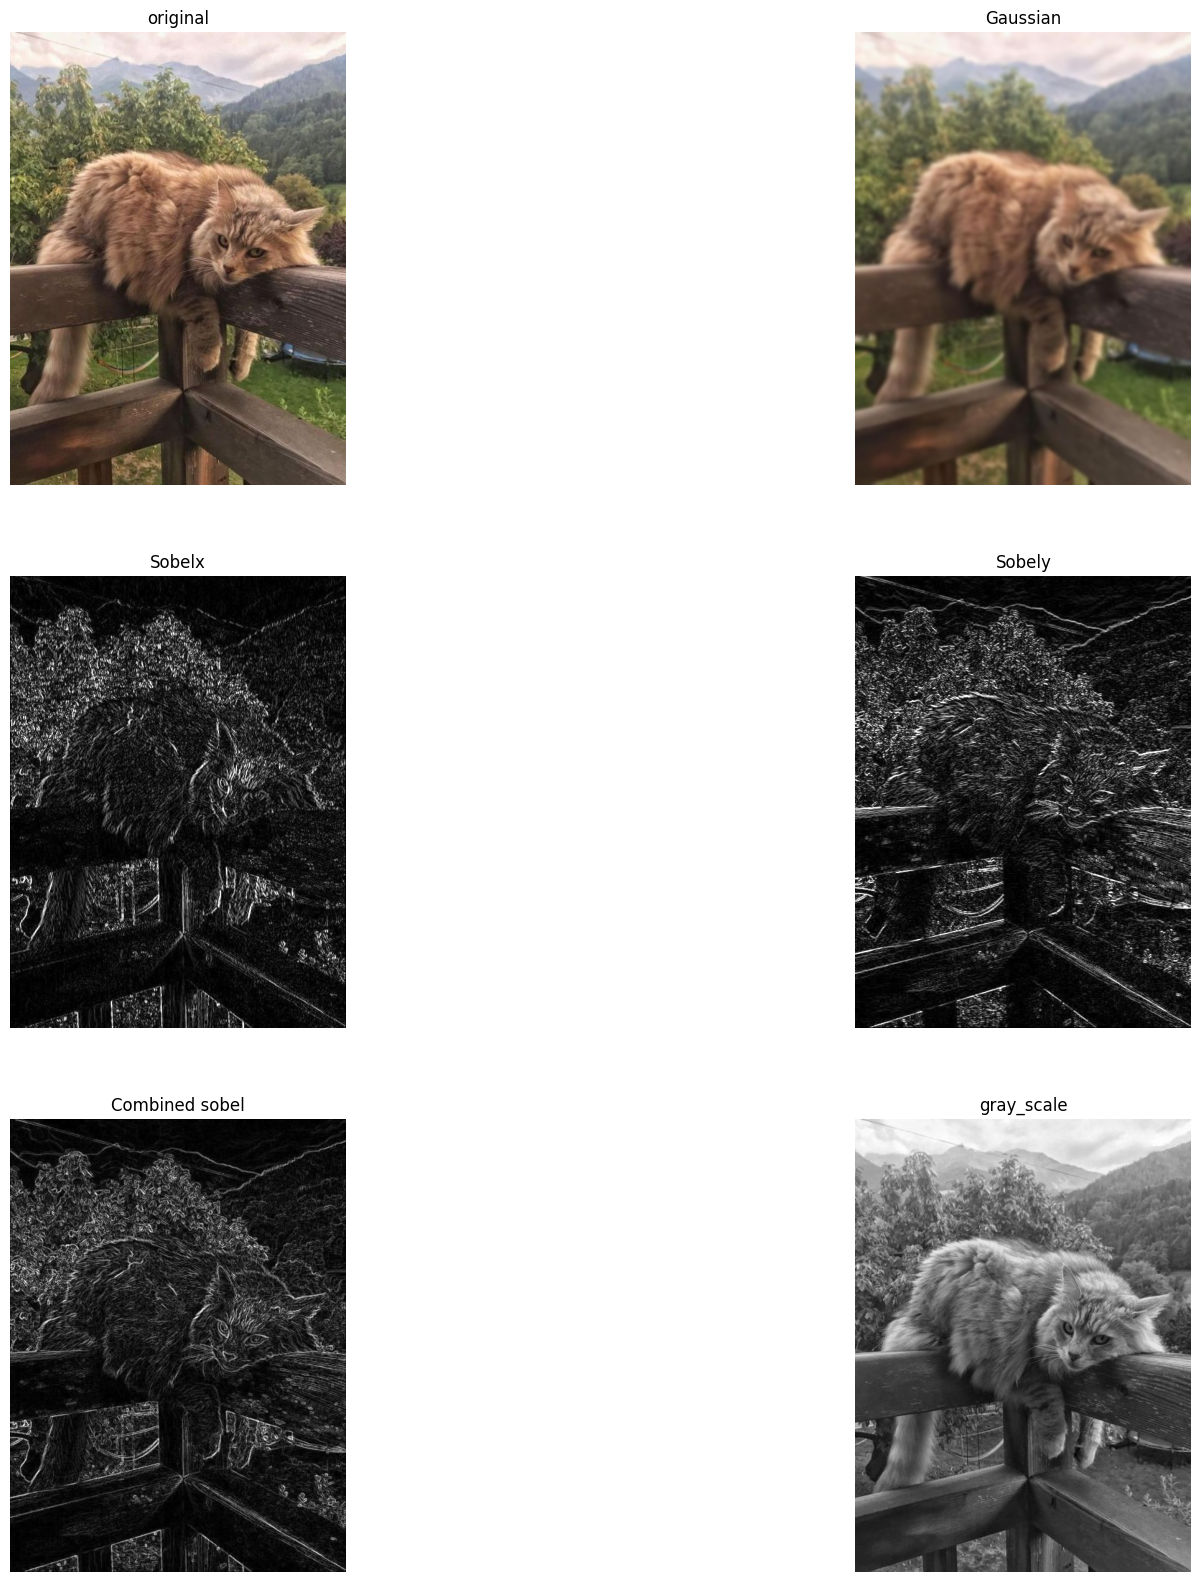

In [51]:
titles = ['original' , 'Gaussian' , 'Sobelx' , 'Sobely' , 'Combined sobel' , 'gray_scale']
images = [image_rgb ,img_Gaussian , sobelx , sobely , img_combined , gray]

n= 6
plt.figure(figsize=(20 , 20))
for i in range(n):
    plt.subplot(3 , 2 , i+1)
    plt.title(titles[i])
    if titles[i] in[ 'Sobelx' , 'Sobely'  , 'Combined sobel' ,'gray_scale']  :
        plt.imshow(images[i] , cmap= 'gray')
    else : 
        plt.imshow(images[i])
    plt.axis('off')



plt.show()
